# Malicious and Benign Websites
***

## Описание содержимого выборки

### Контекст


Вредоносные веб-сайты вызывают большое беспокойство, поскольку их сложно анализировать по одному и индексировать каждый URL-адрес в черном списке.

Проект состоял в оценке различных моделей классификации для прогнозирования вредоносных и легитимных веб-сайтов на основе характеристик прикладного уровня и сети. Данные были получены с использованием различных проверенных источников легитимных и вредоносных URL-адресов в низкоинтерактивном клиентском honeypot для изоляции сетевого трафика. Были использованы дополнительные инструменты для получения другой информации, такой как страна сервера с помощью Whois.е.

### Данные

`URL`: это анонимная идентификация URL, проанализированного в исследовании;

`URL_LENGTH`: это количество символов в URL;

`NUMBER_SPECIAL_CHARACTERS`: это количество специальных символов, идентифицированных в `URL`, таких как, “/”, “%”, “#”, “&”, “. “, “=”;

`CHARSET`: стандарт кодировки символов (также называемый набором символов);

`SERVER`: операционная система сервера, полученная из ответа на пакет;

`CONTENT_LENGTH`: представляет размер содержимого HTTP-заголовка;

`WHOIS_COUNTRY`: страны, которые были получены из ответа сервера;

`WHOIS_STATEPRO`: состояния, которые были получены из ответа сервера;

`WHOIS_REDDATE`: дата регистрации сервера, имеет значения даты в формате ДД / ММ /ГГГГ ЧЧ: ММ;

`WHOIS_UPDATED_DATE`: дата последнего обновления с проанализированного сервера;

`TCP_CONVERSATION_EXCHANGE`: количество TCP-пакетов, которыми обмениваются сервер и клиент honeypot;

`DIST_REMOTE_TCP_PORT`: количество обнаруженных портов, отличных от TCP

`REMOTE_IPS`: общее количество IP-адресов, подключенных к honeypot;

`APP_BYTES`: количество переданных байтов. 

`SOURCE_APP_PACKETS`: пакеты, отправляемые из honeypot на сервер;

`REMOTE_APP_PACKETS`: пакеты, полученные с сервера;

`APP_PACKETS`: общее количество IP-пакетов, сгенерированных во время обмена данными между honeypot и сервером;

`DNS_QUERY_TIMES`: количество DNS-пакетов, сгенерированных во время обмена данными между honeypot и сервером;

`TYPE`: тип анализируемой веб-страницы, в частности, 1 для вредоносных веб-сайтов и 0 для доброкачественных веб-сайтов.

### Что такое honeypot?

Honeypot – это разновидность программ, представляющих собой некую ловушку для злоумышленников, которая помогает отследить атаки и подобрать эффективные методы для борьбы с ними.


Принцип работы Honeypot достаточно прост: он ничего не делает на сервере в спокойном состоянии, но при атаке на него начинает собирать информацию о злоумышленнике. Исходя из полученной информации, определяется примерная тактика взломщика, а затем уже и варианты отражения атак.к.

Чтобы сделать ловушки более привлекательными для злоумышленников, их намеренно делают уязвимыми. Например, используют порты, которые можно обнаружить с помощью сканирования, или ненадежные пароли. Уязвимые порты часто оставляют открытыми: так растут шансы, что приманка сработает и преступник отвлечется от защищенных реальных сетей.

Ловушка – не антивирус и не сетевой экран, она не помогает решать конкретные проблемы безопасности. Это скорее информационный инструмент, помогающий изучить существующие и выявить новые угрозы. Используя собранные данные, можно приоритизировать проблемы и правильно распределить ИБ-ресурсы.

### Авторы выборки

Urcuqui, C., Navarro, A., Osorio, J., & Garcıa, M. (2017). Machine Learning Classifiers to Detect Malicious Websites. CEUR Workshop Proceedings. Vol 1950, 14-17.

## Подключение необходимых библиотек

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('dataset.csv')
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type;;
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1;;
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0;;
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0;;
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0;;
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1;;
1772,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1;;
1773,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0;;
1774,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0;;


Обратимся к основным данных о датафрейме: заголовок, количество значений, тип данных столбцов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1776 non-null   object 
 1   URL_LENGTH                 1776 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1776 non-null   int64  
 3   CHARSET                    1769 non-null   object 
 4   SERVER                     1600 non-null   object 
 5   CONTENT_LENGTH             964 non-null    float64
 6   WHOIS_COUNTRY              1470 non-null   object 
 7   WHOIS_STATEPRO             1414 non-null   object 
 8   WHOIS_REGDATE              1649 non-null   object 
 9   WHOIS_UPDATED_DATE         1637 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1776 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1776 non-null   int64  
 12  REMOTE_IPS                 1776 non-null   int64  
 13  APP_BYTES                  1776 non-null   int64

Проверяем тип данных в таблице

In [6]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type;;                        object
dtype: object

`object` - тип данных строковых и смешанных значений

`int64` - целые числа

`float64` - числа с плавающей точкой

А теперь подсчитаем количество данных разного типа

In [7]:
print(df.dtypes.value_counts())

int64      11
object      8
float64     2
Name: count, dtype: int64


Просмотрим размер датасета

In [8]:
print(df.shape)

(1776, 21)


Обратимся к основной информации о датасете

In [9]:
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
count,1776.000000,1776.000000,964.000000,1776.000000,1776.000000,1776.000000,1.776000e+03,1776.000000,1776.000000,1.776000e+03,1.776000e+03,1776.000000,1775.000000
mean,57.003378,11.115991,11598.744813,16.298423,5.480856,3.064189,2.990029e+03,18.583896,18.788851,1.593665e+04,3.163776e+03,18.583896,2.269859
std,27.570795,4.554033,36441.522096,40.551215,21.836516,3.388022,5.612927e+04,41.676957,46.455405,6.995530e+04,5.613246e+04,41.676957,2.932512
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,49.000000,10.000000,1840.000000,7.000000,0.000000,2.000000,6.820000e+02,8.000000,9.000000,5.940000e+02,7.380000e+02,8.000000,0.000000
75%,68.000000,13.000000,11169.000000,22.000000,5.000000,5.000000,2.329250e+03,26.000000,25.000000,9.813000e+03,2.715250e+03,26.000000,4.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000


`count` - количество заполненных строк в каждом столбце

`mean` - среднее значение

`std` - стандартное отклонение, показывает разброс значений

`min`, `max` - минимальное и максимальное значение

`25%`, `50%`, `75%` - процентили. Число, показывающее распределение значений в выборке. Например, 25% от всех значений столбца длины url меньше, чем 39.

## Названия колонок датасета

In [10]:
print(df.columns)

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type;;'],
      dtype='object')


## Сортировка и фильтрация записей

In [11]:
df.sort_values('URL_LENGTH', ascending = False).head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type;;
1775,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0;;
1774,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0;;
1773,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0;;
1772,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1;;
1771,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1;;


Параметр `ascending` - указывает на тип сортировки. От меньшего к большему - `True`.

In [12]:
df.dropna().head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type;;
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0;;
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0;;
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0;;
11,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/11/2016 0:00,23/11/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0;;
16,M0_97,21,7,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,...,0,2,603,8,9,1580,745,8,2.0,1;;


In [13]:
df.isnull()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type;;
0,False,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1772,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1774,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


`dropha()` - метод, удаляющий все строки с пропусками. Удаляется полностью строка, содержащая `NaN`.

Сохраним новый датафрейм и назовём его `df_without_nan`.

In [14]:
df_without_nan = df.dropna()

In [15]:
df_without_nan.isnull()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type;;
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1769,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Построение диаграмм

## Столбчатая диаграмма, демонстрирующая количество серверов по типу используемой кодировки

In [16]:
ddff = df
ddff['CHARSET'].replace({
    'iso-8859-1':'ISO-8859-1',
    'ISO-8859':'ISO-8859-1',
    'utf-8':'UTF-8'}, inplace = True)
pd.options.mode.chained_assignment = None

In [17]:
ddff['CHARSET'].value_counts()

CHARSET
UTF-8           1050
ISO-8859-1       562
us-ascii         155
windows-1251       1
windows-1252       1
Name: count, dtype: int64

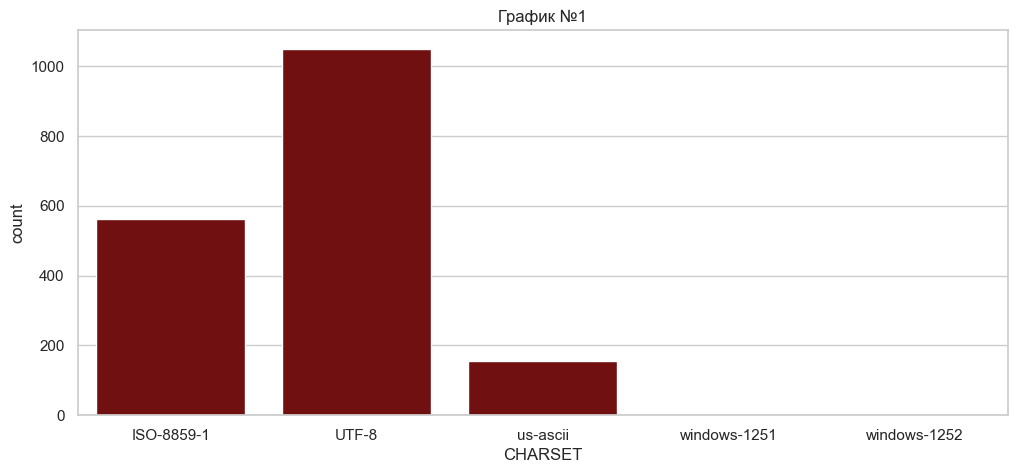

In [19]:
graph1 = sns.countplot(label = 'CHARSET', x = 'CHARSET', color = 'maroon', data = ddff)
plt.title("График №1")
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid")
plt.show()

## Круговая диаграмма, демонстрирующая количество серверов по типу используемой операционной системы

Посмотрим количество уникальных названий операционных систем

In [20]:
df['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

Заменим похожие названия позиций

In [21]:
new_df = df.dropna(subset = ['SERVER'])
for item in new_df['SERVER']:
        if 'Apache' in item:
            new_df['SERVER'].replace({item:'Apache'}, inplace = True)
        elif 'nginx' in item:
            new_df['SERVER'].replace({item:'nginx'}, inplace = True)
        elif 'openresty' in item:
            new_df['SERVER'].replace({item:'openresty'}, inplace = True)
        elif 'Microsoft-IIS' in item:
            new_df['SERVER'].replace({item:'Microsoft-IIS'}, inplace = True)
        elif 'codfw.wmnet' in item:
            new_df['SERVER'].replace({item:'codfw.wmnet'}, inplace = True)
        elif 'YouTubeFrontEnd' not in item:
            new_df['SERVER'].replace({item:'Other'}, inplace = True)
pd.options.mode.chained_assignment = None

Проверим результат

In [22]:
new_df['SERVER'].unique()

array(['nginx', 'Apache', 'Other', 'openresty', 'Microsoft-IIS',
       'codfw.wmnet', 'YouTubeFrontEnd'], dtype=object)

In [23]:
new_df['SERVER'].value_counts()

SERVER
Apache             643
nginx              430
Other              331
Microsoft-IIS       85
codfw.wmnet         61
YouTubeFrontEnd     42
openresty            8
Name: count, dtype: int64

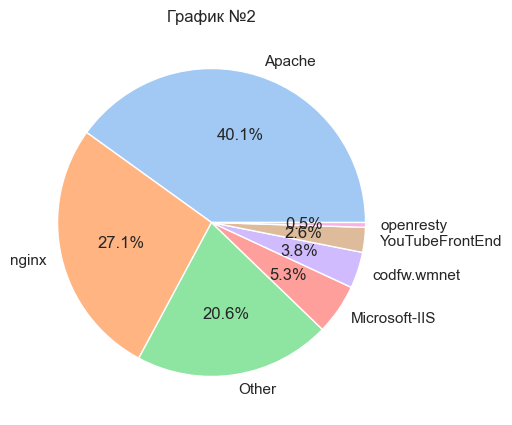

In [24]:
counts = [643, 435, 331, 85, 61, 42, 8]
servers = ['Apache', 'nginx', 'Other', 'Microsoft-IIS', 'codfw.wmnet', 'YouTubeFrontEnd', 'openresty']
palette_color = sns.color_palette('pastel')
plt.title('График №2')
plt.pie(counts, labels = servers, colors=palette_color, autopct='%.1f%%')
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

## Столбчатые диаграммы, демонстрирующие количество вредоносных и легитимных серверов по типу используемой операционной системы

In [60]:
new_df['Type;;'].unique()

array(['1;;', '0;;', '0', '0;'], dtype=object)

In [61]:
new_df['Type;;'].replace({
    '1;;':'1',
    '0;;':'0',
    '0;':'0'}, inplace = True)
pd.options.mode.chained_assignment = None

In [62]:
new_df['Type;;'].unique()

array(['1', '0'], dtype=object)

In [65]:
evil_servers = new_df[new_df['Type;;'] == '1']
kind_servers = new_df[new_df['Type;;'] == '0']


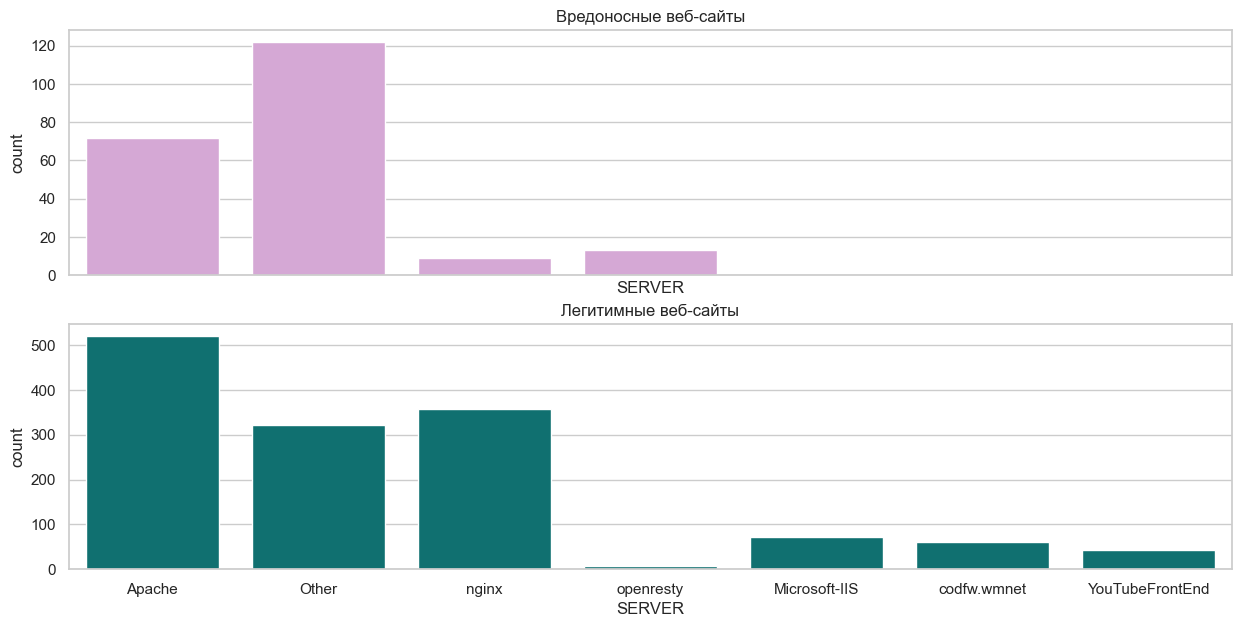

In [116]:
fig, axes = plt.subplots(2, 1, sharex = True)
axes[0].set_title("Вредоносные веб-сайты")
graph2 = sns.countplot(x = 'SERVER', color = 'plum', data = evil_servers, ax=axes[0])
axes[1].set_title("Легитимные веб-сайты")
graph3 = sns.countplot(x = 'SERVER', color = 'teal', data = kind_servers, ax=axes[1])
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style("whitegrid")
plt.show()

## Рассыпчатая диаграмма, демонстрирующая взаимосвязь количества DNS-пакетов в обмене между honeypot и сервером, количества переданных байт и страны-отправителя

Скорректируем список стран, убрав повторяющиеся

In [78]:
temp_df = df.dropna(subset = ['WHOIS_COUNTRY'])
temp_df['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SE', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'us',
       'KR', 'HK', 'UA', 'CH', 'United Kingdom', 'BS', 'PK', 'IT',
       'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [89]:
temp_df['WHOIS_COUNTRY'].replace({
    'us':'US',
    'ru':'RU',
    'se':'SE',
    'United Kingdom':'UK',
    'Cyprus':'CY'}, inplace = True)
pd.options.mode.chained_assignment = None

Выполним проверку внесённых изменений

In [90]:
temp_df['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

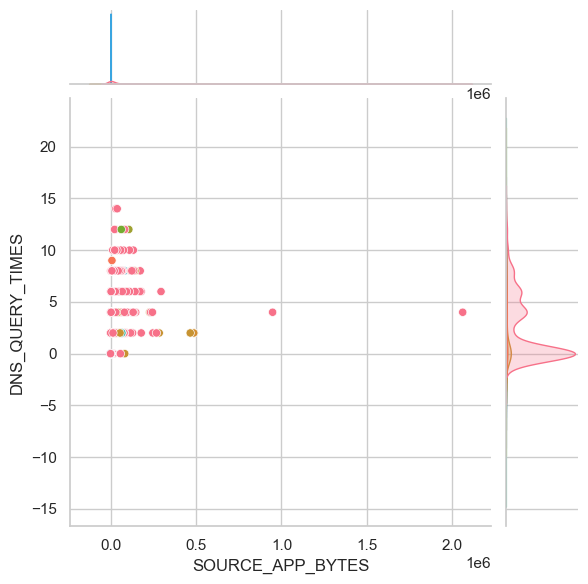

In [135]:
graph3 = sns.jointplot(data=temp_df, y ="DNS_QUERY_TIMES", x ="SOURCE_APP_BYTES", hue="WHOIS_COUNTRY")
sns.set(rc={'figure.figsize':(10,10)})
graph3.ax_joint.legend_.remove()
sns.set_style("whitegrid")
plt.show()